<a href="https://colab.research.google.com/github/neha1-1/FUTURE_ML_02/blob/main/future_intern_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy Score: 0.8695

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1607
           1       0.72      0.55      0.63       393

    accuracy                           0.87      2000
   macro avg       0.81      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [09:40:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


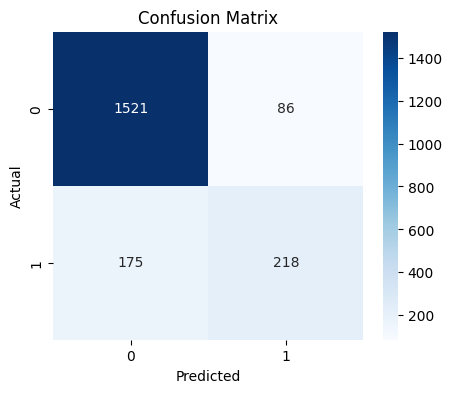

   Actual  Predicted  Churn_Probability
0       0          0           0.021329
1       0          0           0.008369
2       0          0           0.116290
3       0          0           0.019407
4       0          0           0.137873
5       0          0           0.014634
6       0          0           0.053385
7       1          0           0.119835
8       0          0           0.251440
9       0          1           0.515188
Predictions saved to Google Drive as churn_predictions.csv


In [5]:
!pip install xgboost scikit-learn pandas matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Churn_Modelling.csv'
df = pd.read_csv(file_path)
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
X = df.drop('Exited', axis=1)
y = df['Exited']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
df_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Churn_Probability': y_probs
})
print(df_results.head(10))
df_export = df.copy()
df_export['Churn_Probability'] = model.predict_proba(X_scaled)[:, 1]
df_export.to_csv('/content/drive/MyDrive/churn_predictions.csv', index=False)
print("Predictions saved to Google Drive as churn_predictions.csv")
